In [190]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [191]:
#read data
genre_data = pd.read_csv('data/data_by_genres.csv')

#look at data
print(genre_data.info()) #get info about colums and values
print(genre_data.isnull().sum()) #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB
None
mode                0
genres              0
acousticness        0
dance

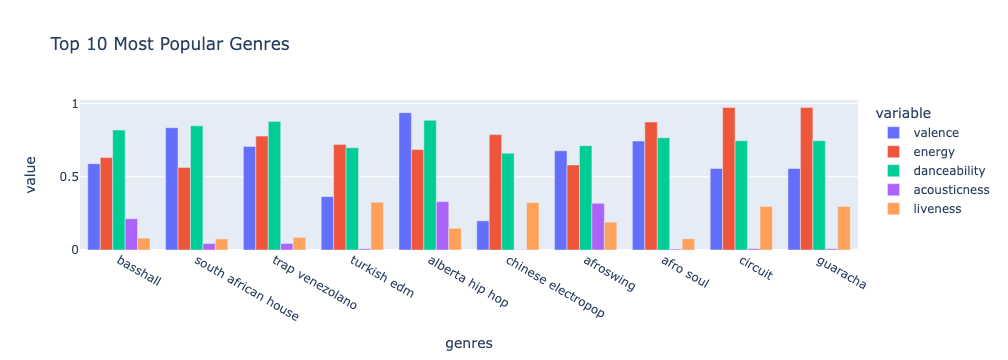

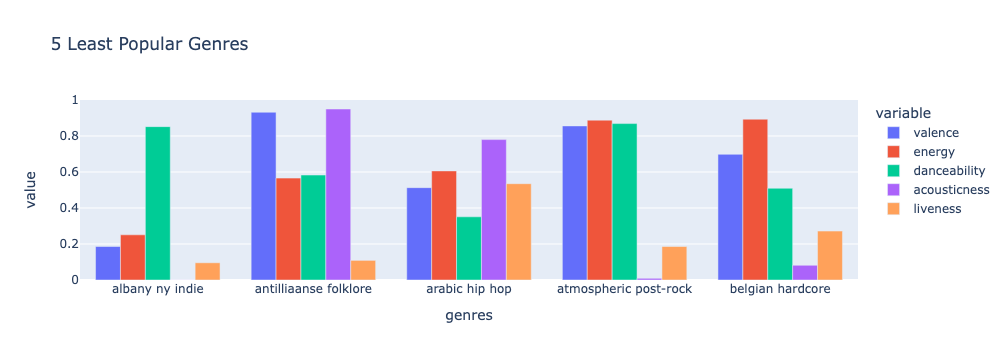

In [192]:
#compare the top 10 most popular genres using 5 features
top10_genres = genre_data.nlargest(10, 'popularity')
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness', 'liveness'], barmode='group', title='Top 10 Most Popular Genres')
fig.show()

#compare the 5 least popular genres using 5 features
least5_genres = genre_data.nsmallest(5, 'popularity')
fig = px.bar(least5_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness', 'liveness'], barmode='group', title='5 Least Popular Genres')
fig.show()

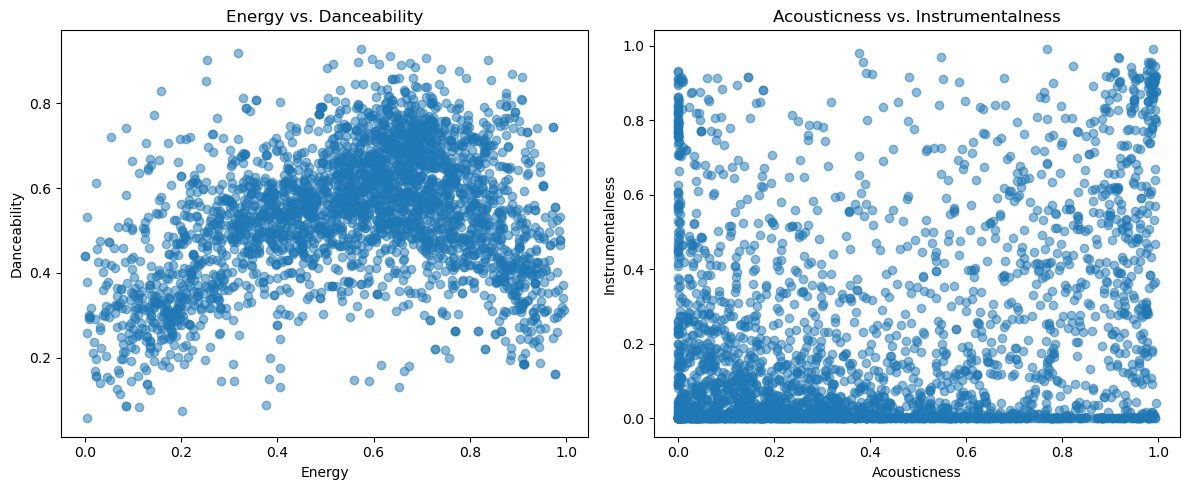

In [193]:
# Scatter plot: Energy vs. Danceability
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
plt.scatter(genre_data['energy'], genre_data['danceability'], alpha=0.5)
plt.title('Energy vs. Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')

# Scatter plot: Acousticness vs. Instrumentalness
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.scatter(genre_data['acousticness'], genre_data['instrumentalness'], alpha=0.5)
plt.title('Acousticness vs. Instrumentalness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')

plt.tight_layout()
plt.show()

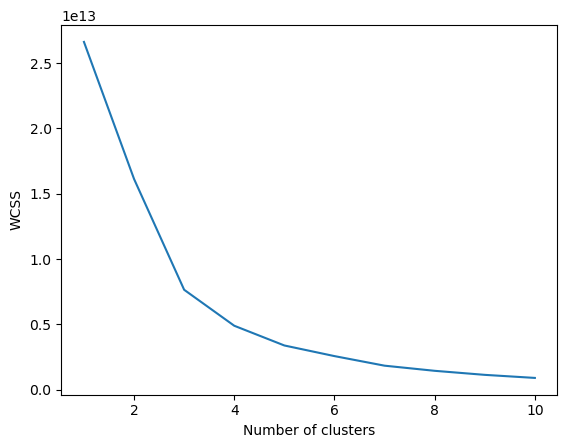

In [194]:
# Elbow method to find the number of clusters

X = genre_data.select_dtypes(np.number) # only cluster columns with numerical values (so not the "genre" column)

wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.006s...
[t-SNE] Computed neighbors for 2973 samples in 0.532s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.795205
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.431091
[t-SNE] KL divergence after 1000 iterations: 1.248817


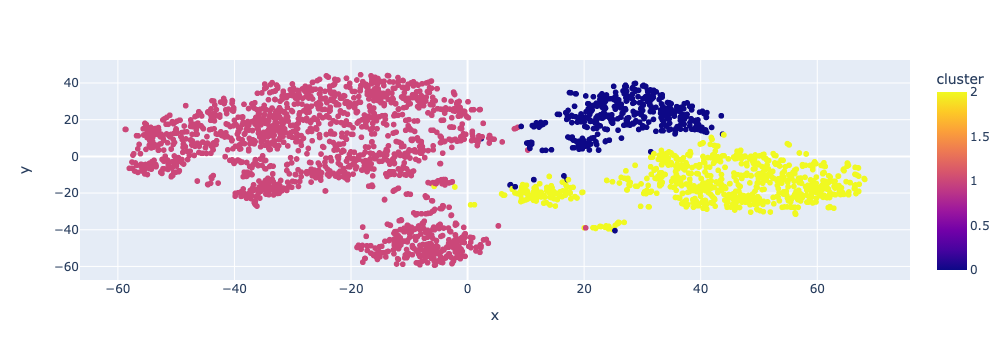

In [200]:
# trying k-means with k=3
scaler = StandardScaler()
X = genre_data.select_dtypes(np.number)
X_scaled = scaler.fit_transform(X)  # Use fit_transform instead of fit
kmeans = KMeans(n_clusters=3, random_state=42)
genre_data['cluster'] = kmeans.fit_predict(X_scaled)

# Plotting with TSNE
tsne = TSNE(n_components=2, verbose=1)
genre_embedding = tsne.fit_transform(X_scaled)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.004s...
[t-SNE] Computed neighbors for 2973 samples in 0.508s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.796030
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.344391
[t-SNE] KL divergence after 1000 iterations: 1.234002


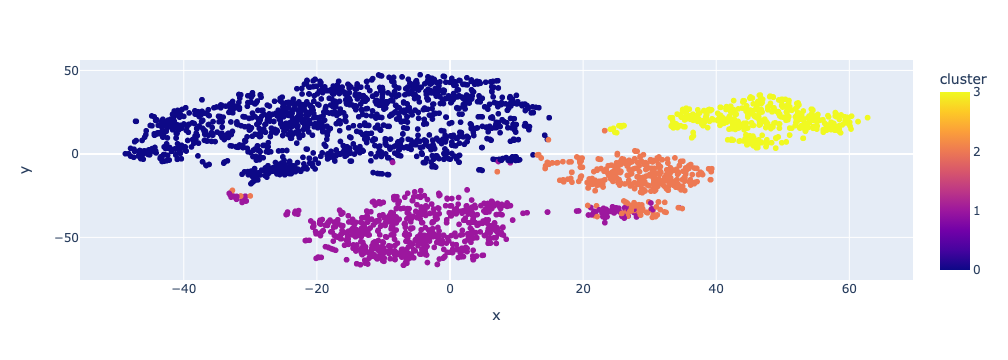

In [201]:
# trying k-means with k=3
scaler = StandardScaler()
X = genre_data.select_dtypes(np.number)
X_scaled = scaler.fit_transform(X)  # Use fit_transform instead of fit
kmeans = KMeans(n_clusters=4, random_state=42)
genre_data['cluster'] = kmeans.fit_predict(X_scaled)

# Plotting with TSNE
tsne = TSNE(n_components=2, verbose=1)
genre_embedding = tsne.fit_transform(X_scaled)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.004s...
[t-SNE] Computed neighbors for 2973 samples in 0.389s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.813665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.406029
[t-SNE] KL divergence after 1000 iterations: 1.182290


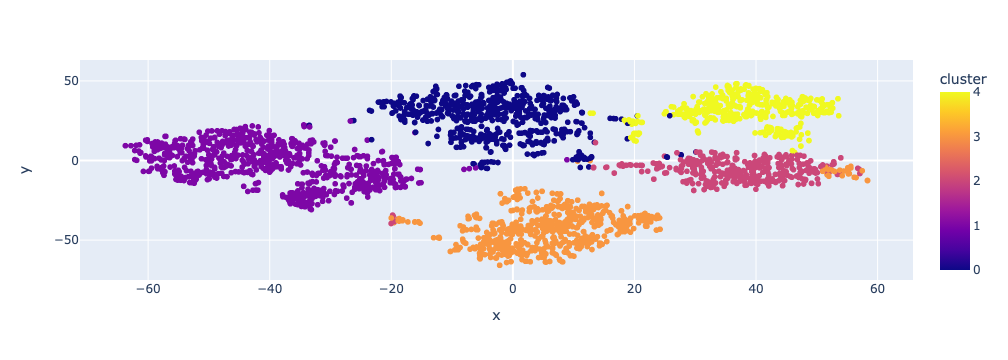

In [212]:
# trying k-means with k=5
scaler = StandardScaler()
X = genre_data.select_dtypes(np.number)
X_scaled = scaler.fit_transform(X)  # Use fit_transform instead of fit
kmeans = KMeans(n_clusters=5, random_state=42)
genre_data['cluster'] = kmeans.fit_predict(X_scaled)


# Plotting with TSNE
tsne = TSNE(n_components=2, verbose=1)
genre_embedding = tsne.fit_transform(X_scaled)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

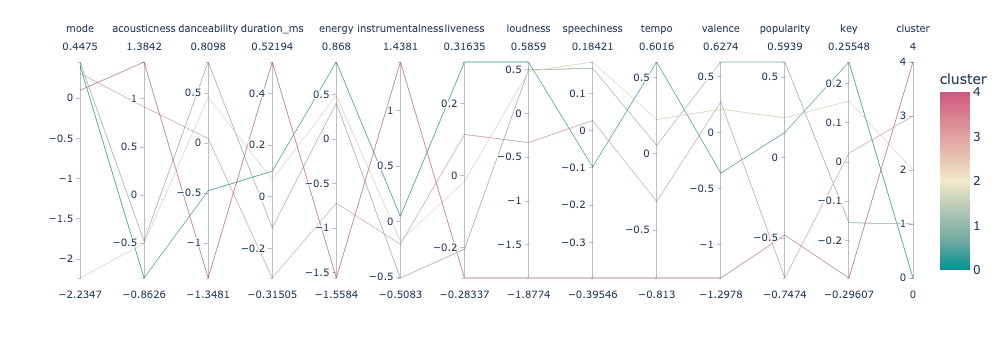

In [213]:
# plot centroids in each cluster
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids['cluster'] = centroids.index

fig = px.parallel_coordinates(centroids, color="cluster",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [226]:
cluster_1_data = genre_data[genre_data['cluster'] == 0]
cluster_2_data = genre_data[genre_data['cluster'] == 1]
cluster_3_data = genre_data[genre_data['cluster'] == 2]
cluster_4_data = genre_data[genre_data['cluster'] == 3]
cluster_5_data = genre_data[genre_data['cluster'] == 4]

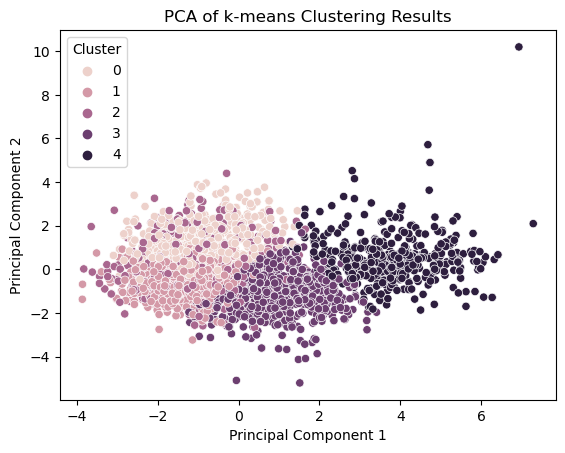

In [217]:
X = genre_data.select_dtypes(np.number).drop('cluster', axis=1)
y = genre_data['cluster']

X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = y

# Visualize the results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df)
plt.title('PCA of k-means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [218]:
# Get the explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio for PC1: {explained_var_ratio[0]}')
print(f'Explained Variance Ratio for PC2: {explained_var_ratio[1]}')

# Get the contributions of each original feature to PC1 and PC2
feature_contributions = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print('\nFeature Contributions to Principal Components:')
print(feature_contributions)

Explained Variance Ratio for PC1: 0.2975466820460299
Explained Variance Ratio for PC2: 0.12118015092363493

Feature Contributions to Principal Components:
         mode  acousticness  danceability  duration_ms    energy  \
PC1  0.049011      0.413783     -0.311621     0.103332 -0.437994   
PC2 -0.083997     -0.334751     -0.424968     0.373195  0.269257   

     instrumentalness  liveness  loudness  speechiness     tempo   valence  \
PC1          0.315606 -0.054919 -0.459240    -0.103243 -0.249996 -0.278578   
PC2          0.281932  0.077545  0.098549    -0.192579  0.248397 -0.505404   

     popularity       key  
PC1   -0.240688 -0.067376  
PC2    0.197100  0.015298  


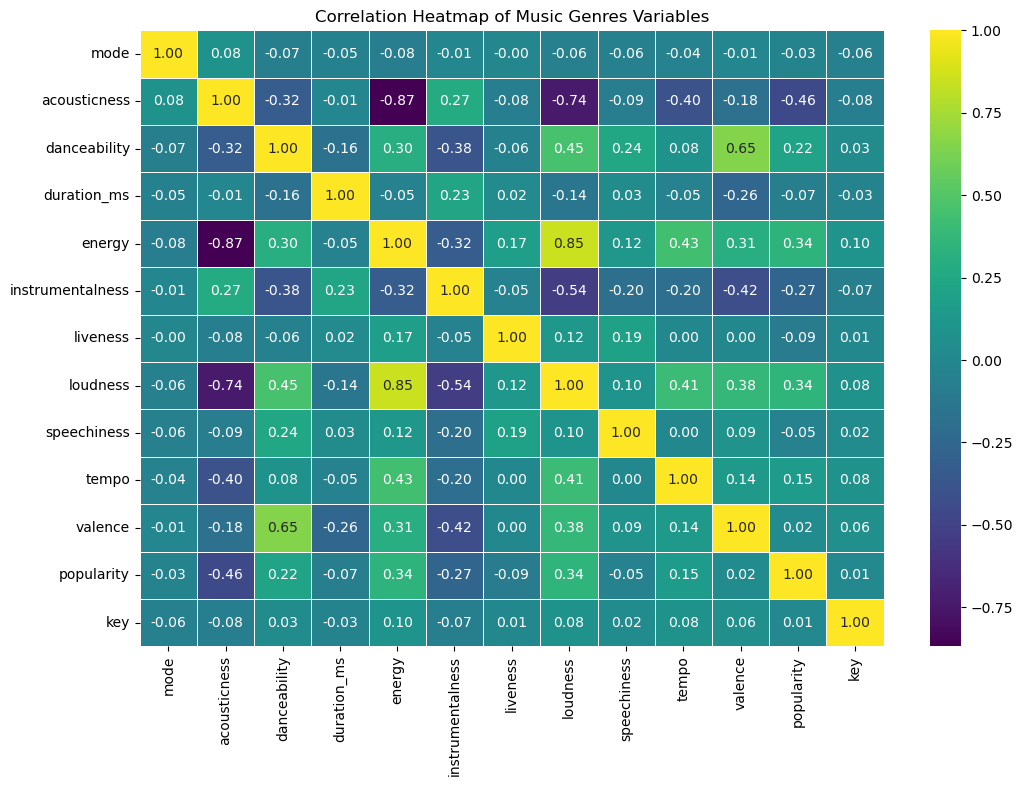

In [24]:
# Calculate the correlation matrix
correlation_matrix = genre_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Music Genres Variables')
plt.show()

      mode         genres  acousticness  danceability    duration_ms  \
11       1      acid rock      0.256915      0.447239  259203.914331   
19       1      adoracion      0.432857      0.504714  302906.071429   
40       1  alabama metal      0.002748      0.406500  199820.000000   
47       1     album rock      0.186182      0.512031  268948.224960   
49       1       alt-idol      0.000305      0.466250  240353.750000   
...    ...            ...           ...           ...            ...   
2948     1      wrestling      0.027916      0.565535  238974.827393   
2950     1  wyoming indie      0.000461      0.405750  156513.250000   
2953     1       xtra raw      0.005500      0.467000  230500.000000   
2965     1          zeuhl      0.285011      0.359500  413526.500000   
2968     1           zolo      0.222625      0.547082  258099.064530   

        energy  instrumentalness  liveness   loudness  speechiness  \
11    0.580649          0.150926  0.230451 -11.433073     0.06760

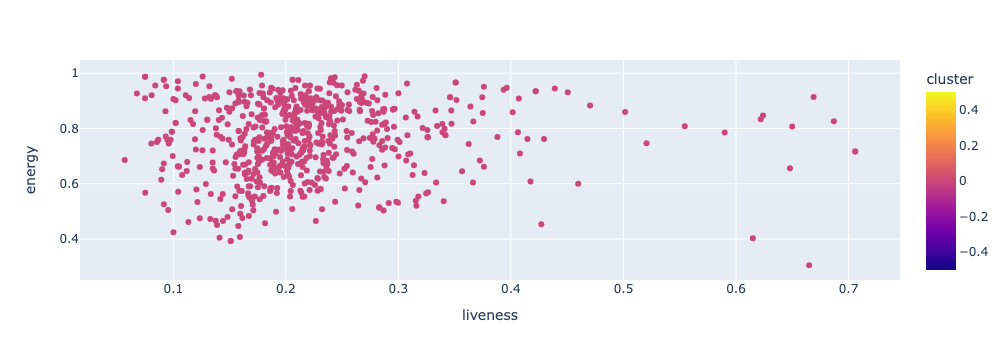

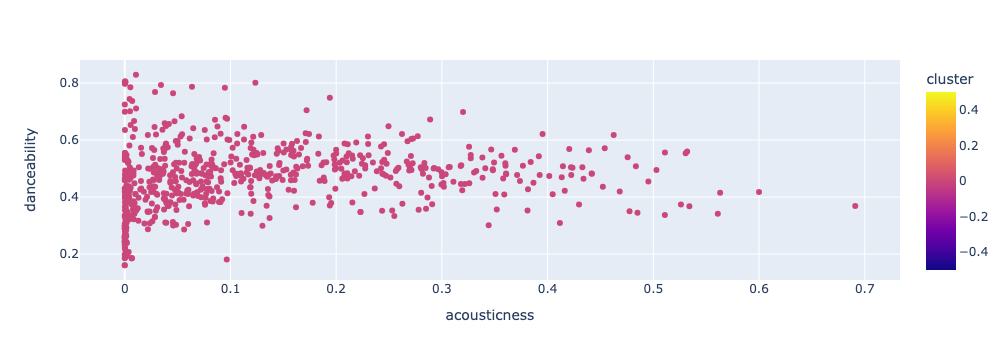

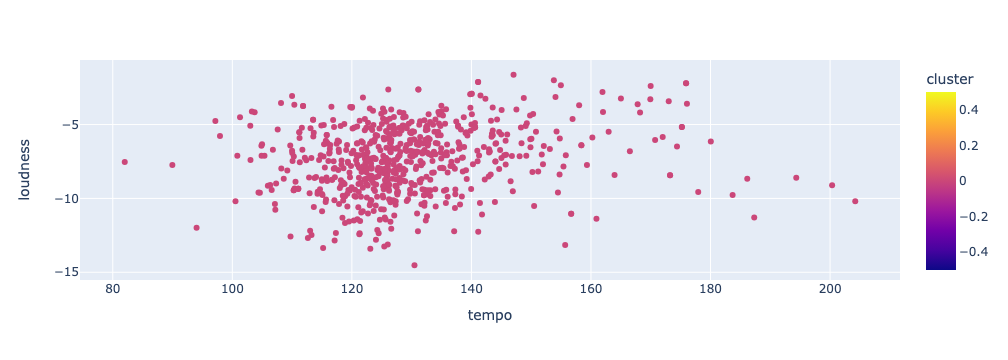

In [229]:
#cluster 1 analysis
print(cluster_1_data)

#expect: low liveness, medium-high energy
fig1 = px.scatter(cluster_1_data, x='liveness', y='energy', color='cluster')
fig1.show()

#expect: low acousticness, medium-low danceability
fig2 = px.scatter(cluster_1_data, x='acousticness', y='danceability', color='cluster')
fig2.show()

#expec: medium temopo, medium loudness 
fig3 = px.scatter(cluster_1_data, x='tempo', y='loudness', color='cluster')
fig3.show()

      mode             genres  acousticness  danceability    duration_ms  \
2        1              8-bit      0.762000      0.712000  115177.000000   
6        1     abstract beats      0.342147      0.623000  229936.200000   
7        1   abstract hip hop      0.243854      0.694571  231849.234160   
12       1        acid trance      0.006830      0.663000  221160.000000   
15       1       acoustic pop      0.490235      0.535108  235379.783555   
...    ...                ...           ...           ...            ...   
2962     1  yugoslav new wave      0.272000      0.583500  234947.000000   
2963     1      yugoslav rock      0.280400      0.560972  234421.722222   
2966     1      zhongguo feng      0.434976      0.574426  251337.727723   
2970     1               zouk      0.263261      0.748889  306072.777778   
2972     1             zydeco      0.421038      0.629409  171671.690476   

        energy  instrumentalness  liveness   loudness  speechiness  \
2     0.818000   

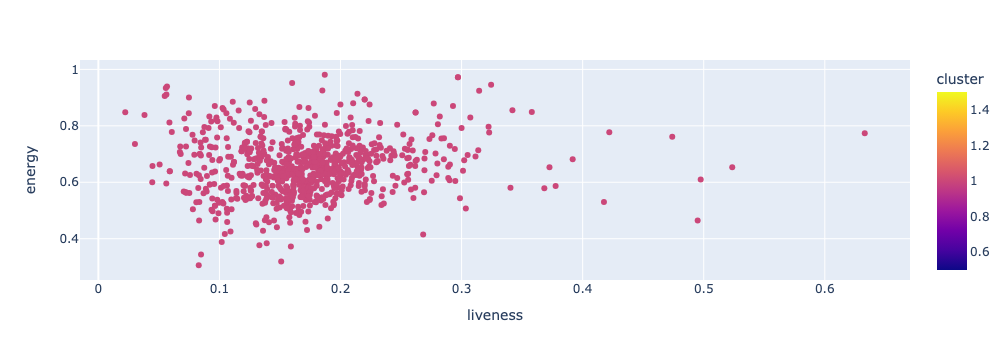

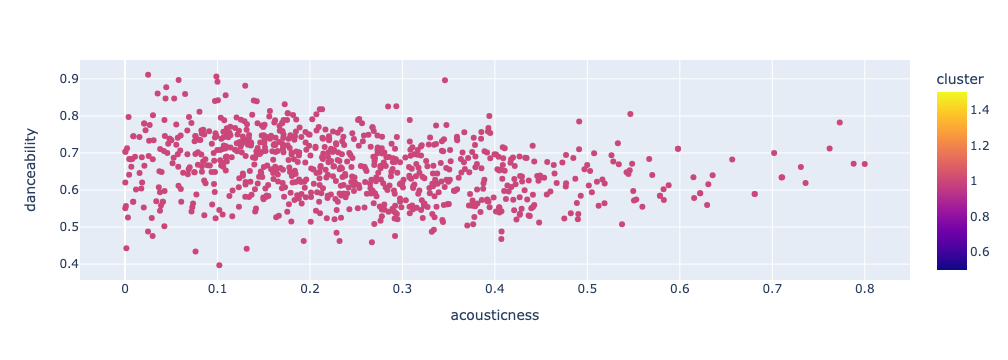

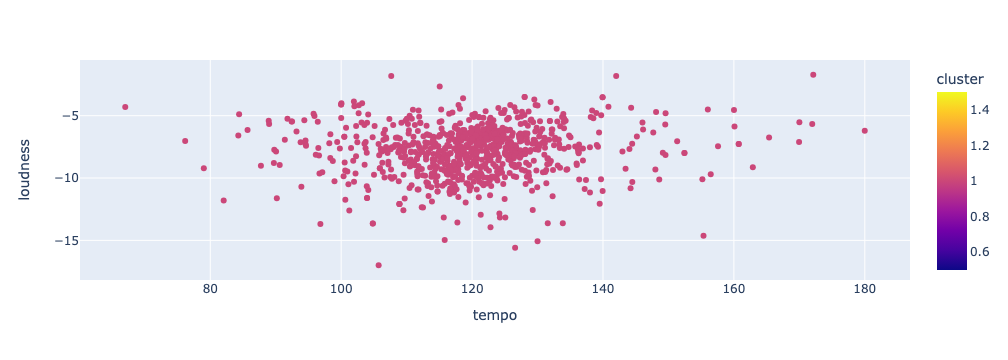

In [230]:
#cluster 2 analysis
print(cluster_2_data)

#expect: low liveness, medium energy
fig1 = px.scatter(cluster_2_data, x='liveness', y='energy', color='cluster')
fig1.show()

#expect: low acousticness, medium danceability
fig2 = px.scatter(cluster_2_data, x='acousticness', y='danceability', color='cluster')
fig2.show()

#expec: medium temopo, medium loudness 
fig3 = px.scatter(cluster_2_data, x='tempo', y='loudness', color='cluster')
fig3.show()

      mode               genres  acousticness  danceability    duration_ms  \
8        0            accordeon      0.323000      0.588000  164000.000000   
10       0           acid house      0.067951      0.677400  297188.053846   
18       0          action rock      0.229000      0.412000  198400.000000   
24       0   african percussion      0.327000      0.600364  289556.272727   
28       0       afro dancehall      0.143900      0.643458  199565.228535   
...    ...                  ...           ...           ...            ...   
2926     0    west coast reggae      0.151845      0.736093  276320.928571   
2929     0  west virginia indie      0.000293      0.595000  214533.000000   
2964     0          zambian pop      0.473000      0.689000   42813.000000   
2967     0         zimdancehall      0.016600      0.766000  174893.000000   
2969     0              zouglou      0.161000      0.863000  206320.000000   

        energy  instrumentalness  liveness   loudness  speechin

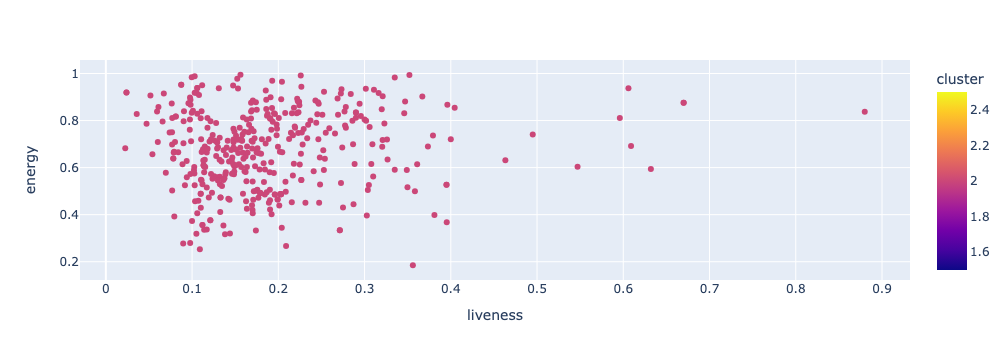

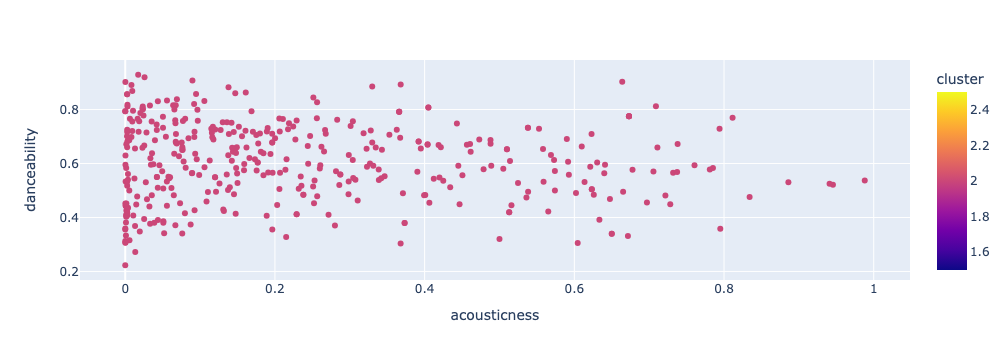

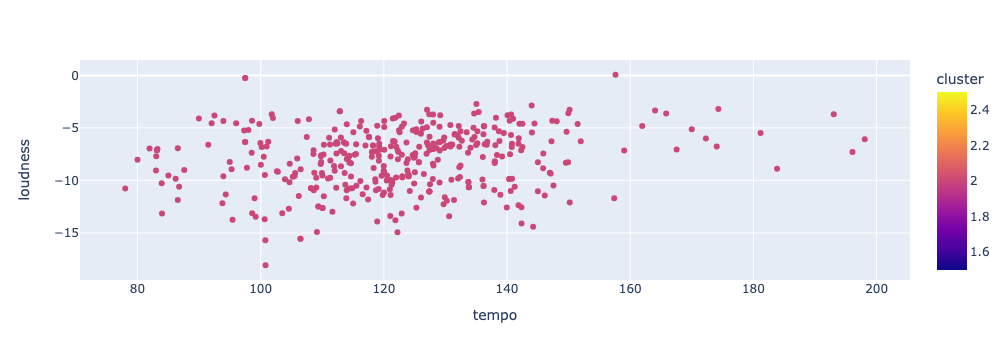

In [231]:
#cluster 3 analysis
print(cluster_3_data)

#expect: low liveness, medium-high energy
fig1 = px.scatter(cluster_3_data, x='liveness', y='energy', color='cluster')
fig1.show()

#expect: low acousticness, medium danceability
fig2 = px.scatter(cluster_3_data, x='acousticness', y='danceability', color='cluster')
fig2.show()

#expec: medium temopo, medium loudness 
fig3 = px.scatter(cluster_3_data, x='tempo', y='loudness', color='cluster')
fig3.show()

      mode          genres  acousticness  danceability    duration_ms  \
3        1              []      0.651417      0.529093  232880.890250   
4        1      a cappella      0.676557      0.538961  190628.540887   
9        1       accordion      0.446125      0.624812  167061.562500   
14       1  acoustic blues      0.761724      0.606915  204321.250879   
17       1   acoustic rock      0.613201      0.524397  195036.000000   
...    ...             ...           ...           ...            ...   
2955     1           ye ye      0.578145      0.472091  197321.197555   
2957     1        yodeling      0.774283      0.568622  184384.081190   
2960     1      york indie      0.764500      0.676000  177846.500000   
2961     1  yorkshire folk      0.502667      0.443333  331333.333333   
2971     0    zurich indie      0.993000      0.705667  198417.333333   

        energy  instrumentalness  liveness   loudness  speechiness  \
3     0.419146          0.205309  0.218696 -12.288965

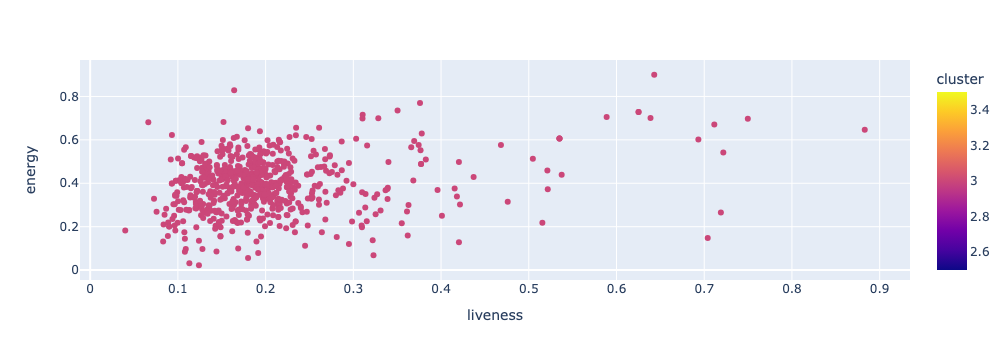

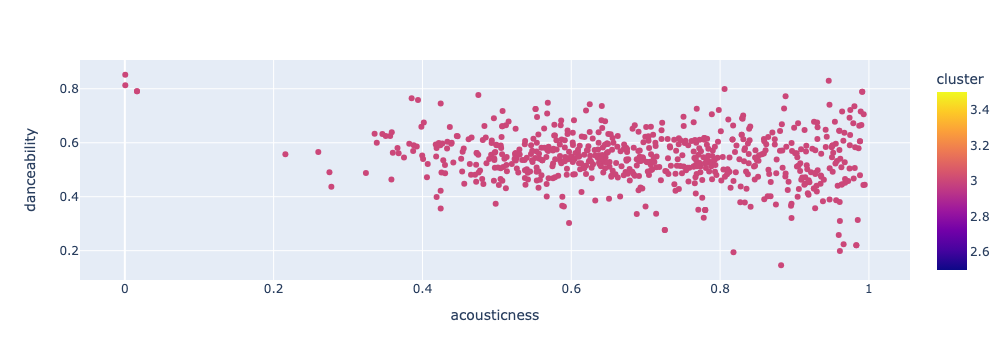

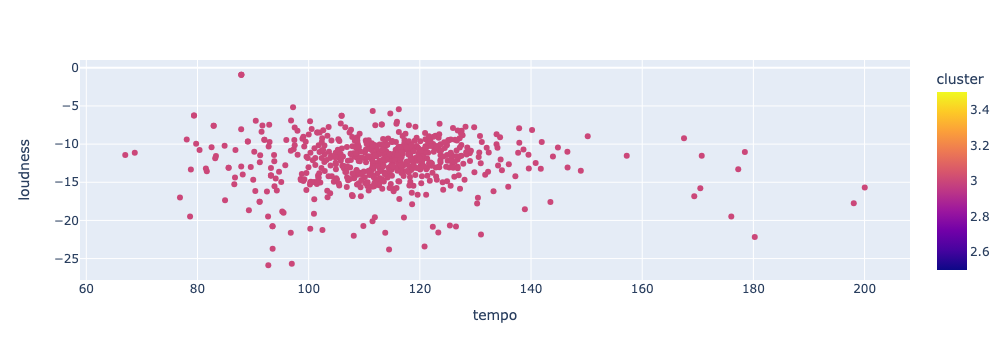

In [227]:
#cluster 4 analysis
print(cluster_4_data)

#expect: low liveness, low energy
fig1 = px.scatter(cluster_4_data, x='liveness', y='energy', color='cluster')
fig1.show()

#expect: high acousticness, medium danceability
fig2 = px.scatter(cluster_4_data, x='acousticness', y='danceability', color='cluster')
fig2.show()

#expec: lower temopo, medium loudness 
fig3 = px.scatter(cluster_4_data, x='tempo', y='loudness', color='cluster')
fig3.show()

      mode                      genres  acousticness  danceability  \
0        1      21st century classical      0.979333      0.162883   
1        1                       432hz      0.494780      0.299333   
5        1                    abstract      0.459210      0.516167   
13       1                  acousmatic      0.917019      0.420458   
27       1  african-american classical      0.925534      0.283976   
...    ...                         ...           ...           ...   
2944     1                world fusion      0.610374      0.500996   
2945     1            world meditation      0.950786      0.349643   
2956     0                yiddish folk      0.946000      0.385000   
2958     1                        yoga      0.769000      0.130000   
2959     0                        yoik      0.975000      0.334000   

       duration_ms    energy  instrumentalness  liveness   loudness  \
0     1.602977e+05  0.071317          0.606834  0.361600 -31.514333   
1     1.048887e+0

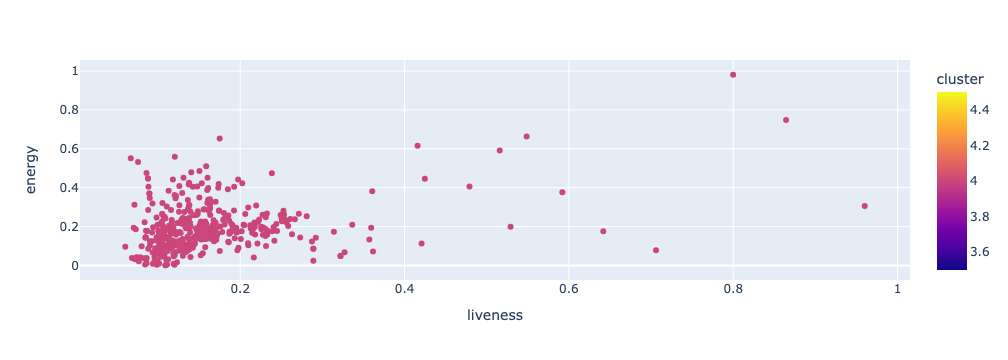

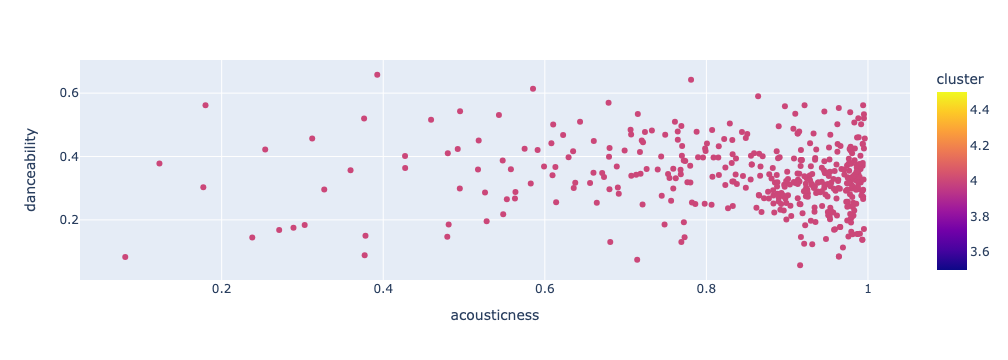

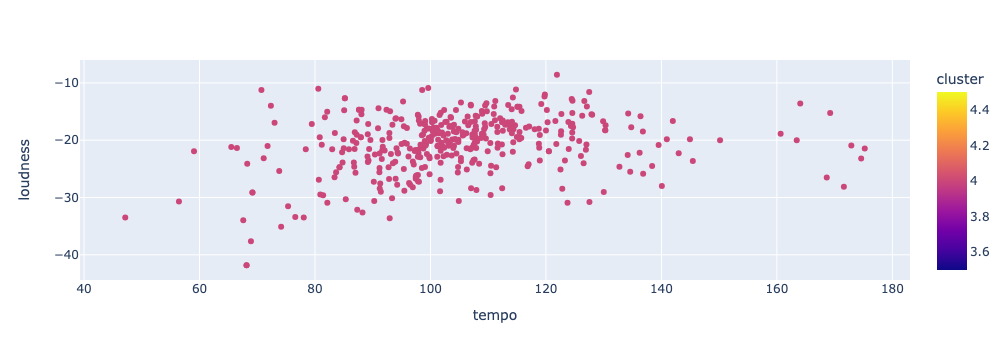

In [232]:
#cluster 5 analysis
print(cluster_5_data)

#expect: low liveness, low energy
fig1 = px.scatter(cluster_5_data, x='liveness', y='energy', color='cluster')
fig1.show()

#expect: high acousticness, medium danceability
fig2 = px.scatter(cluster_5_data, x='acousticness', y='danceability', color='cluster')
fig2.show()

#expec: medium temopo, medium loudness 
fig3 = px.scatter(cluster_5_data, x='tempo', y='loudness', color='cluster')
fig3.show()

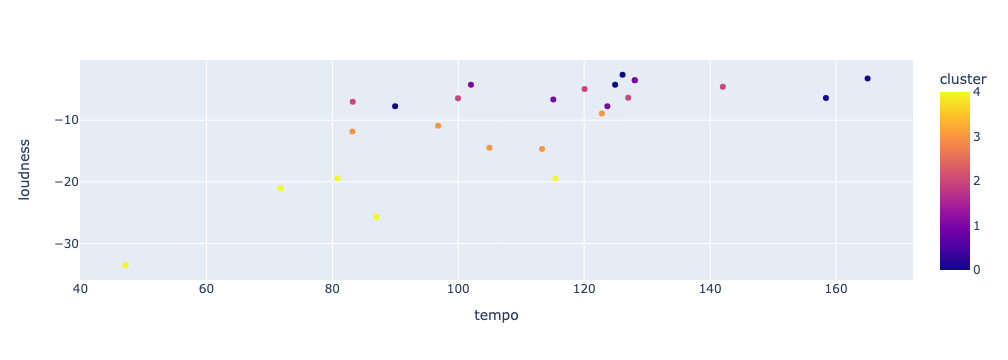

In [228]:
top5_genres_per_cluster = cluster_1_data.nlargest(5, 'popularity')
top5_genres_per_cluster = top5_genres_per_cluster.append(cluster_2_data.nlargest(5, 'popularity'), ignore_index=True)
top5_genres_per_cluster = top5_genres_per_cluster.append(cluster_3_data.nlargest(5, 'popularity'), ignore_index=True)
top5_genres_per_cluster = top5_genres_per_cluster.append(cluster_4_data.nlargest(5, 'popularity'), ignore_index=True)
top5_genres_per_cluster = top5_genres_per_cluster.append(cluster_5_data.nlargest(5, 'popularity'), ignore_index=True)

fig = px.scatter(top5_genres_per_cluster, x='tempo', y='loudness', color='cluster')
fig.show()

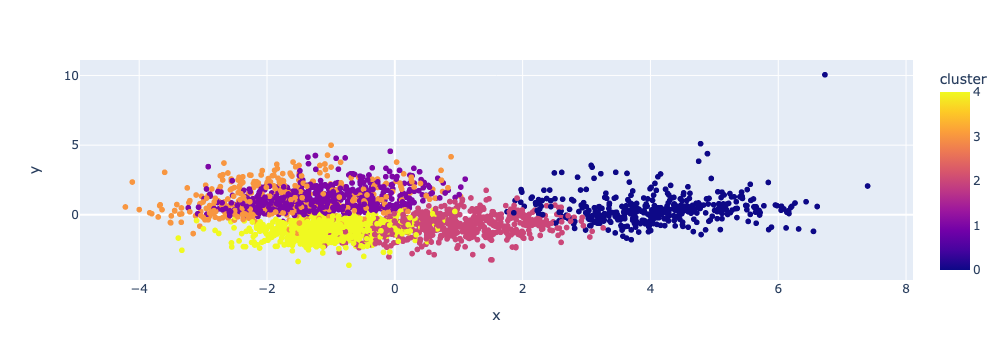

In [234]:
# trying k-means with k=5
scaler = StandardScaler()
X = genre_data.select_dtypes(np.number)
X_scaled = scaler.fit_transform(X)  # Use fit_transform instead of fit
kmeans = KMeans(n_clusters=5, random_state=42)
genre_data['cluster'] = kmeans.fit_predict(X_scaled)


# Plotting with PCA for comparison - less specific, more overlap
pca = PCA(n_components=2)
genre_embedding = pca.fit_transform(X_scaled)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

In [236]:
print(tsne)
genre_embedding

TSNE(verbose=1)


array([[ 6.08725244,  0.42412539],
       [ 3.07245693,  3.54884603],
       [-0.43073861, -1.6896277 ],
       ...,
       [-0.43912922, -1.70855206],
       [ 1.49856842, -1.64758149],
       [-0.71250269, -1.64545985]])